In [1]:
import sys
sys.path.insert(0, '/home/nuwah/2023_projects/Statistics-Handbooks') # add path to syspath where top-level of package is

In [2]:
from Regression.LinearRegression import LinearRegressionMethods
from Regression import evaluate
from DataGenerator import DataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### Polynomial regression example
Technically, polynomial regression is a special case of Multiple Linear Regression, so we will use the same methods as linear regression to solve our parameters

<Axes: >

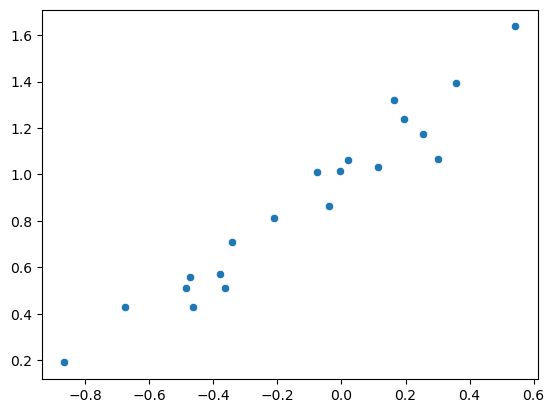

In [74]:
# Make a new DataGenerator
dg = DataGenerator(num_samples=20, domain=(-1,1), num_features=1, noise_std=0.1, seed=20) # Init data generator
p = dg.generate_polynomial(degrees=[1], coefficients=[[1,1]]) #This makes a simple quadratic y = x^2 (+0x+0)
#p = dg.generate_polynomial(degrees=[2], coefficients=[[2,5,4]]) # This makes quadratic y = 2x^2 + 5x + 4
#p = dg.generate_polynomial(degrees=[3], coefficients=[[1,0,0,0]]) # This makes simple cubic y = x^3
sns.scatterplot(x=dg.X.flatten(),y=p[1])

In [75]:
# X data
p[0]

array([[-0.07792121,  1.        ],
       [-0.00411985,  1.        ],
       [ 0.35882224,  1.        ],
       [ 0.30157183,  1.        ],
       [-0.46240952,  1.        ],
       [-0.86535067,  1.        ],
       [ 0.54289028,  1.        ],
       [-0.03803174,  1.        ],
       [-0.34158718,  1.        ],
       [ 0.02128211,  1.        ],
       [-0.47274234,  1.        ],
       [-0.3789769 ,  1.        ],
       [ 0.25370688,  1.        ],
       [ 0.11489962,  1.        ],
       [-0.36284088,  1.        ],
       [-0.21031356,  1.        ],
       [-0.48405083,  1.        ],
       [ 0.16448225,  1.        ],
       [-0.67674258,  1.        ],
       [ 0.19626764,  1.        ]])

In [76]:
# y (response/target) variable
p[1]

array([1.0104681 , 1.01546665, 1.39457589, 1.06724564, 0.42910722,
       0.19061896, 1.63683721, 0.86412016, 0.7087225 , 1.06192356,
       0.55960376, 0.57168201, 1.1745052 , 1.03066283, 0.50920885,
       0.81425796, 0.51152969, 1.3212455 , 0.42836829, 1.23690448])

In [77]:
# Instantiate linear regression object
lr = LinearRegressionMethods(p[0], p[1])

# Solve the linear regression regression by ordinary least squares
lr_ols = lr.ols()

Execution time : 1683676ns == 0.001683676s


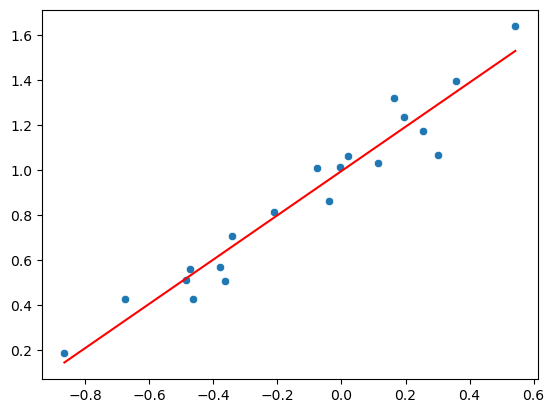

In [78]:
data = sns.scatterplot(x=dg.X.flatten(),y=p[1])
sns.lineplot(x=dg.X.flatten(), y=lr_ols.predictions, color='red')
plt.show()

In [40]:
# Access the weights learned via OLS
lr_ols.weights

array([4.22069427, 3.02294375, 1.87854759, 0.96657407])

In [70]:
# R^2 for this fit
evaluate.coefficientOfDetermination(lr_ols)

0.8174133636586212

In [59]:
# Solve the linear regression regression by gradient descent 
lr = LinearRegressionMethods(p[0], p[1])
lr_mse_gd = lr.mse_gradient_descent()

Execution time : 18820365ns == 0.018820365s


In [43]:
# Access the weights learned by MSE Gradient Descent
lr_mse_gd.weights

array([3.45734833, 3.08108868, 2.38183484, 0.46421728])

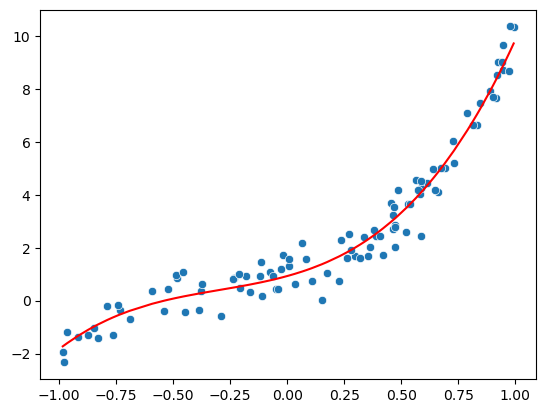

In [60]:
data = sns.scatterplot(x=dg.X.flatten(),y=p[1])
sns.lineplot(x=dg.X.flatten(), y=lr_mse_gd.predictions, color='red')
plt.show()

In [61]:
# R^2 for this fit
evaluate.coefficientOfDetermination(lr_mse_gd)

0.9664096782541667